<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/price/prepocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
diag = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/RYH_DrNote_202412.csv', encoding='cp874')
diag.head()

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname
0,608768,O,SKIN ห้องผิวหนัง,เกลื้อนที่หลัง,มีผื่นขาวที่หลัง ต้นแขนใหม่ คันเวลาเหงื่อออก,เกลื้อน(Pityriasis versicolor),NaN,NaN,hypopigmented macule with fine scale at back a...,[B36.0] Pityriasis versicolor,DRF0096,พญ. ขวัญเสด็จ วังศิริไพศาล
1,886211,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพบริษัท,NaN,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,NaN,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...",NaN,[Z00] General examination and investigation of...,DRF0235,พญ. ณภัทร เทพหัสดิน ณ อยุธยา
2,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
3,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
4,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ


In [ ]:
income = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/RYH_PatIncom_202412.csv', encoding='cp874')
income.head()

,ID,IncomeCode,IncomeCode.1,Amt
0,1125436,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.0
1,1127453,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,340.0
2,1132595,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,1200.0
3,1133791,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,336.0
4,1133261,140,2.3 ค่าอาหารผู้ป่วย,1400.0


# duplicate
```
Removing all IDs with duplicates (keep only IDs that appear once)
```

In [ ]:
# นับจำนวนแถวต่อคู่ (ID, IncomeCode)
dup_counts = income.groupby(['ID', 'IncomeCode']).size().reset_index(name='count')

# กรองเฉพาะคู่ที่มีจำนวนซ้ำ > 1 (หมายถึงคู่ (ID,IncomeCode) นี้มีมากกว่า 1 แถว)
dups = dup_counts[dup_counts['count'] > 1]

# จำนวนคู่ (ID,IncomeCode) ที่ซ้ำกันมากกว่า 1 ครั้ง
num_duplicate_pairs = len(dups)
print(f"จำนวนคู่ (id, income_code) ที่ซ้ำมากกว่า 1 ครั้ง: {num_duplicate_pairs}")

จำนวนคู่ (id, income_code) ที่ซ้ำมากกว่า 1 ครั้ง: 0


In [ ]:
counts = diag['ID'].value_counts()
unique_ids = counts[counts == 1].index  # IDs appearing exactly once
# print(len(unique_ids))
diag1 = diag[diag['ID'].isin(unique_ids)]
print(diag.shape)
print(diag1['ID'].nunique())  # Should give number of IDs appearing exactly once
diag1.head()

(11992, 12)
10610


,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname
0,608768,O,SKIN ห้องผิวหนัง,เกลื้อนที่หลัง,มีผื่นขาวที่หลัง ต้นแขนใหม่ คันเวลาเหงื่อออก,เกลื้อน(Pityriasis versicolor),NaN,NaN,hypopigmented macule with fine scale at back a...,[B36.0] Pityriasis versicolor,DRF0096,พญ. ขวัญเสด็จ วังศิริไพศาล
1,886211,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพบริษัท,NaN,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,NaN,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...",NaN,[Z00] General examination and investigation of...,DRF0235,พญ. ณภัทร เทพหัสดิน ณ อยุธยา
2,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
3,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
4,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ


In [ ]:
counts.head(1)
# diag[diag['ID']==1132725]

,count
ID,
1128345,5


In [ ]:
x = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/merged.csv')
x

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,650.0
1,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,85.0
2,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,100.0
3,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,100.0
4,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58388,1146358,O,ER ห้องฉุกเฉิน,ผื่นแดงที่ขาขวา,3-4 วัน เป็นผื่นแดงที่ขาขวา เกาแล้วเป็นแผล วัน...,เซลล์เนื้อเยื่ออักเสบที่ส่วนอื่นที่แขนขา(Cellu...,"Dressing wound, HM ATBx, F/U OPD Sx. พรุ่งนี้",NaN,"? affected part: Rt thigh\r\n- Skin redness, s...",[L03.1] Cellulitis of other parts of limb,DRF1222,นพ. ศุภกร เทพบำรุง,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.0
58389,1146358,O,ER ห้องฉุกเฉิน,ผื่นแดงที่ขาขวา,3-4 วัน เป็นผื่นแดงที่ขาขวา เกาแล้วเป็นแผล วัน...,เซลล์เนื้อเยื่ออักเสบที่ส่วนอื่นที่แขนขา(Cellu...,"Dressing wound, HM ATBx, F/U OPD Sx. พรุ่งนี้",NaN,"? affected part: Rt thigh\r\n- Skin redness, s...",[L03.1] Cellulitis of other parts of limb,DRF1222,นพ. ศุภกร เทพบำรุง,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,1330.5
58390,1146358,O,ER ห้องฉุกเฉิน,ผื่นแดงที่ขาขวา,3-4 วัน เป็นผื่นแดงที่ขาขวา เกาแล้วเป็นแผล วัน...,เซลล์เนื้อเยื่ออักเสบที่ส่วนอื่นที่แขนขา(Cellu...,"Dressing wound, HM ATBx, F/U OPD Sx. พรุ่งนี้",NaN,"? affected part: Rt thigh\r\n- Skin redness, s...",[L03.1] Cellulitis of other parts of limb,DRF1222,นพ. ศุภกร เทพบำรุง,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,500.0
58391,1146358,O,ER ห้องฉุกเฉิน,ผื่นแดงที่ขาขวา,3-4 วัน เป็นผื่นแดงที่ขาขวา เกาแล้วเป็นแผล วัน...,เซลล์เนื้อเยื่ออักเสบที่ส่วนอื่นที่แขนขา(Cellu...,"Dressing wound, HM ATBx, F/U OPD Sx. พรุ่งนี้",NaN,"? affected part: Rt thigh\r\n- Skin redness, s...",[L03.1] Cellulitis of other parts of limb,DRF1222,นพ. ศุภกร เทพบำรุง,44,1.1.7 (1) ค่าอุปกรณ์ของใช้และเครื่องมือทางการแ...,330.0


In [ ]:
merged_df = diag1.merge(income, on='ID', how='inner')  # รวมเฉพาะ ID ที่เจอทั้งสองตาราง
merged_df.to_csv('/content/drive/MyDrive/AIEngineer/price/merged.csv', index=False)

In [ ]:
# สมมติ merged_df คือ dataframe ที่ได้จากการ merge
grouped = merged_df.groupby('ID').agg({
    'OcmPatTyp': 'first',        # เอาค่าแรกของแต่ละกลุ่ม (หรือใช้วิธีอื่นตามต้องการ)
    'NurseStation': 'first',
    'CC': 'first',
    'Pi': 'first',
    'Diag': 'first',
    'Plan': 'first',
    'Inv': 'first',
    'PEtext': 'first',
    'ICD10': 'first',
    'PhyDtrCod': 'first',
    'docname': 'first',
    'IncomeCode': lambda x: list(x),       # รวม IncomeCode เป็น list
    'IncomeCode.1': lambda x: list(x),     # รวม IncomeCode.1 เป็น list
    'Amt': lambda x: list(x)                # รวม Amt เป็น list
}).reset_index()
print(grouped.shape)

(9908, 15)


In [ ]:
print(income['IncomeCode'].nunique())
print(grouped['ICD10'].nunique())
print(grouped['Diag'].nunique())
print(grouped['ID'].nunique())
print(grouped.shape)

72
1182
1382
9908
(9908, 15)


In [ ]:
grouped['TotalAmt'] = grouped['Amt'].apply(lambda x: sum(x))
grouped.to_csv('/content/drive/MyDrive/AIEngineer/price/grouped.csv', index=False)

In [ ]:
grouped[['Diag','ICD10']]

,Diag,ICD10
0,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza
1,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza
2,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza
3,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza
4,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza
...,...,...
9903,การติดเชื้อที่ลำไส้จากไวรัสและการติดเชื้อที่ลำ...,[A08] Viral and other specified intestinal inf...
9904,คอหอยอักเสบเฉียบพลัน(Acute pharyngitis),[J02] Acute pharyngitis
9905,การถลอกที่เข่าและขาท่อนปลาย(Abrasion of knee a...,[S80.80] Abrasion of knee and leg (TM)
9906,การเคลื่อน แพลง และเคล็ดของข้อและเอ็นที่ระดับข...,"[S93] Dislocation, sprain and strain of joints..."


## LLM check


```
grouped[['Diag','ICD10']]
```



In [ ]:
import os
import json
import requests
import pandas as pd
from tqdm import tqdm

# Load environment variables
LLM_API_KEY = "Basic bWFuYWdlYWkyMDI0Ok1hbmFnZUFJQDIwMjQ="
LLM_API_URL = "https://ai-api.manageai.co.th/llm-model-02/generate"
LLM_AUTH_USER = "manageai2024"
LLM_AUTH_PASS = "ManageAI@2024"

# Function to generate the LLM response
def generate_response(prompt, model_param, url, auth):
    headers = {"Content-Type": "application/json"}
    data = json.dumps({"inputs": prompt, "parameters": model_param})
    response = requests.post(url, data=data, headers=headers, auth=auth)
    if response.status_code == 200:
        response_json = response.json()
        if "generated_text" in response_json:
            return response_json["generated_text"]
        else:
            print("The 'generated_text' field is missing.")
            return ""
    else:
        print(f"Request failed with status code {response.status_code}")
        print("Response content:", response.content)
        return ""

# Model parameters
model_param = {
    "best_of": 1,
    "frequency_penalty": 1.1,
    "max_new_tokens": 177,
    "repetition_penalty": 1.1,
    "temperature": 0.1,
    "top_k": 10,
    "top_n_tokens": 5,
    "top_p": 0.95,
    "stop": ["assistant"]
}

In [ ]:
# Function to check if Diag and ICD10 are related
def check(input_text):
    prompt = f"""
    ตรวจสอบว่า diagnosis และ ICD10 ที่ระบุมีความหมายตรงกันหรือไม่:
    Diagnosis: {input_text['Diag']}
    ICD10: {input_text['ICD10']}
    ถ้ามีความหมายตรงกัน ให้ตอบว่า 'ตรงกัน', ถ้าไม่ตรงกัน ให้ตอบว่า 'ไม่ตรงกัน'
    """
    refined_response = generate_response(prompt, model_param, LLM_API_URL, (LLM_AUTH_USER, LLM_AUTH_PASS))
    return refined_response.strip()


# Add a new column with the result of the check
grouped['checkdiag'] = ""

# Process each row in batches with tqdm
batch_size = 100  # Set batch size for processing
for i in tqdm(range(0, len(grouped), batch_size), desc="Processing rows in batches"):
    batch = grouped.iloc[i:i + batch_size]
    for index, row in batch.iterrows():
        grouped.at[index, 'checkdiag'] = check(row)

Processing rows in batches:   0%|          | 0/100 [02:18<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
grouped[['Diag', 'ICD10', 'checkdiag']]

<ipython-input-83-cfeda78cca43>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='ICD10', y='TotalAmt', palette='viridis')
<ipython-input-83-cfeda78cca43>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


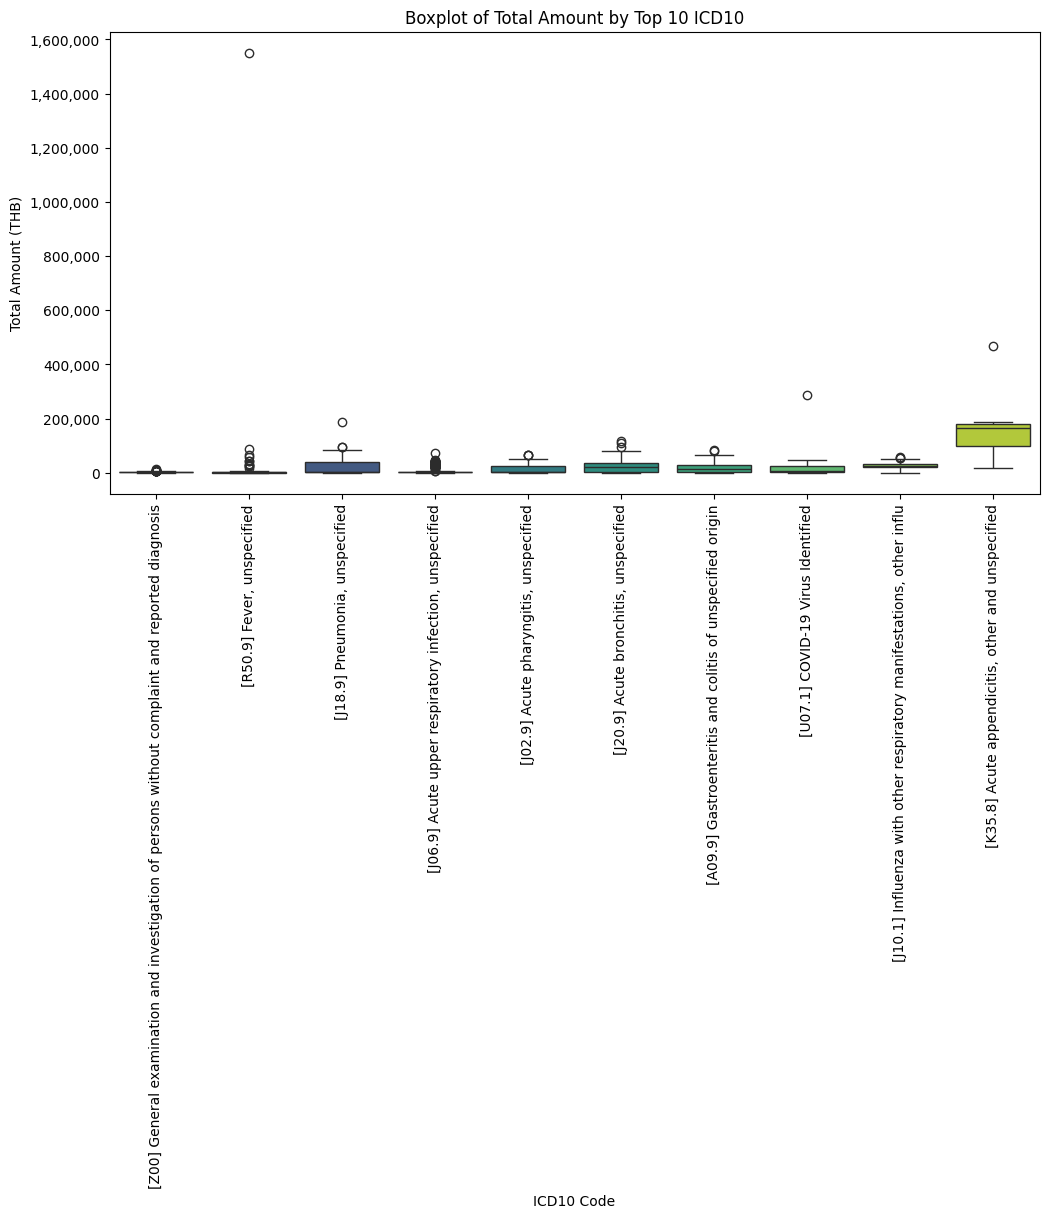

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# สมมติ df คือ DataFrame ที่มีคอลัมน์ ICD10 และ TotalAmt อยู่แล้ว
df = grouped.copy()  # ถ้ามีข้อมูลพร้อมใช้งาน

# เลือก top 10 ICD10 ตาม total sum (เหมือนเดิม เพื่อเลือกตัวอย่างที่สนใจ)
grouped_sum = df.groupby('ICD10')['TotalAmt'].sum().reset_index()
top_icd10_codes = grouped_sum.sort_values(by='TotalAmt', ascending=False).head(10)['ICD10']

# กรองข้อมูลใน df ให้เหลือแค่ top 10 ICD10 ที่เลือกไว้
df_top10 = df[df['ICD10'].isin(top_icd10_codes)]

# plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='ICD10', y='TotalAmt', palette='viridis')

plt.title('Boxplot of Total Amount by Top 10 ICD10')
plt.xlabel('ICD10 Code')
plt.ylabel('Total Amount (THB)')
plt.xticks(rotation=90)

# format y-axis labels ให้ดูเป็นตัวเลขที่มี comma
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


In [ ]:
print(grouped[grouped['ICD10'].str.contains('M32', na=False)]['TotalAmt'].min())
print(grouped[grouped['ICD10'].str.contains('M32', na=False)]['TotalAmt'].max())
a = grouped[(grouped['ICD10'].str.contains('M3', na=False))]
a

5744.0
9008.0


,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt
2637,1130692,O,OPD ทั่วไป,นัดติดตามอาการ,Case Late onset SLE DM \r\n\r\nCriteria\r\n-...,ลูปัส อีริทิมาโตซัส ทั่วร่าง(Systemic lupus er...,- ปฏิเสธ admit ที่นี้ แต่ยอมไปนอน รพ.ใกล้บ้าน\...,K (Potassium),"GA : fatique\r\nHEENT : dry lip, mild pale, no...",[M32] Systemic lupus erythematosus,DRF1223,พญ. นันทมนต์ วงศ์หิรัญเดชา,"[94, 6, 104, 19, 76]","[1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1...","[100.0, 3104.0, 900.0, 1540.0, 100.0]",5744.0
2891,1131270,O,OPD ทั่วไป,นัดติดตามอาการ,Case Late onset SLE \r\n DM \r\n\r\n...,ลูปัส อีริทิมาโตซัส ทั่วร่าง ไม่ระบุรายละเอียด...,Tap off pred\r\nRestart aza,CBC,None,"[M32.9] Systemic lupus erythematosus, unspecified",DRP1163,นพ. ณัฐพงศ์ สุนันทเมธี,"[19, 76, 104, 6, 94]","[1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์, 1...","[320.0, 100.0, 500.0, 7988.0, 100.0]",9008.0


```
case wrong ICD10
```

In [ ]:
print(grouped['Diag'].iloc[240])
print(grouped['ICD10'].iloc[240])

ลูปัส อีริทิมาโตซัส ทั่วร่าง ไม่ระบุรายละเอียด(Systemic lupus erythematosus, unspecified)
[R50.9] Fever, unspecified


In [ ]:
# prompt: grouped[(grouped['ICD10'].str.contains('R50.9', na=False)) & (grouped['TotalAmt'].max())] TypeError: Cannot perform 'and_' with a dtyped [bool] array and scalar of type [bool]

# This checks if the ICD10 contains 'R50.9' AND if the TotalAmt for that row is equal to the overall maximum TotalAmt in the entire grouped DataFrame.
max_total_amt_overall = grouped['TotalAmt'].max()
grouped[(grouped['ICD10'].str.contains('R50.9', na=False)) & (grouped['TotalAmt'] == max_total_amt_overall)]

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt
240,1107610,I,ER ห้องฉุกเฉิน,summary d/c,Case 74 YOF\r\nU/D \r\n@Undifferentiated conn...,ลูปัส อีริทิมาโตซัส ทั่วร่าง ไม่ระบุรายละเอียด...,None,"UA (Urine Analysis), Covid Ag/Influenza A/B, H...",None,"[R50.9] Fever, unspecified",DRF1223,พญ. นันทมนต์ วงศ์หิรัญเดชา,"[27, 13, 30, 159, 33, 156, 7, 70, 16, 142, 19,...","[1.1.5 (4) ค่าตรวจเอกซเรย์คอมพิวเตอร์, 1.1.2 (...","[52500.0, 104575.0, 18370.0, 200.0, 5000.0, 80...",1550795.0


# Pi
```
Pi สามารถทำ rewarding โดยใช้ความยาวของ text ได้
```

In [ ]:
print(grouped[grouped['docname']=='พญ. นันทมนต์ วงศ์หิรัญเดชา']['Pi'].iloc[5])

ไอดีขึ้นมาก ไม่มีเสมหะ ลดเค็มลง 
BW ลง 1 kg
มีนัด รพ.หาดใหญ่ 1/68


In [ ]:
print(a['Pi'].iloc[0])

Case 74 YOF
U/D  
@Undifferentiated connective tissue disease (UCTD) DDx late onset SLE  Dx 7/67
-	Presented prolong fever with myalgia (pattern ของ prolong fever แตกต่างจากรอบนี้
ไข้สูงลอย  38-40*C ตลอด) 
-	Septic work up negative all
-	CBC 30/7/67 : WBC 4,600 [N 75 L 16 Mono 2 Bands 5] Hb 7.2 Hct 23% Plt 173,000
-	DAT 1+ 
-	ANA 1:80
-	Antimyositis profile : strongly positive anti-cN-1A anti-Ro52 strongly positive
-	F/U rheumato on prednisolone 30 mg/day, AZA 50 mg/day, HCQ 200 mg/day 
@MDS-RAEB-1 Dx 7/67
-	CBC 30/7/67 : WBC 4,600 [N 75 L 16 Mono 2 Bands 5] Hb 7.2 Hct 23% Plt 173,000
-	BM no malignancy, blast 5% (ผล patho BM biopsy ดังแนบ), EPO level 8 
-	Ferritin 1669 
-	on ESA 40,000 U SC weekly
-	F/U hemato, hct baseline 24-26%
@DM on bioinsulin 30/70 ฉีด 38 units เช้า, Minidiab(5 mg) 1x2 po ac เช้า เย็น
, suganon(5 mg) 1x1 po pc เช้า
-	Last HbA1c 9/67 7.8 mg%
@Hx of proteus mirabilis MDR, E.coli ESBL UTI 8/67
==========================Hospital course ==============================

In [ ]:
a['Amt'].iloc[0]

[52500.0,
 104575.0,
 18370.0,
 200.0,
 5000.0,
 800.0,
 47900.0,
 45800.0,
 1540.0,
 600.0,
 128030.0,
 2500.0,
 14150.0,
 4800.0,
 12950.0,
 5500.0,
 4600.0,
 22200.0,
 112875.0,
 23550.0,
 54650.0,
 19200.0,
 74000.0,
 11040.0,
 16660.0,
 7600.0,
 147500.0,
 4950.0,
 10390.0,
 8850.0,
 585515.0,
 2000.0]

In [ ]:
a['IncomeCode.1'].iloc[0]

['1.1.5 (4) ค่าตรวจเอกซเรย์คอมพิวเตอร์',
 '1.1.2 (1) เวชภัณฑ์ 1 ค่าเวชภัณฑ์สิ้นเปลืองทางการแพทย์',
 '1.1.5 (7) ค่าเอกซเรย์',
 '2.6.1 (2) ค่าธรรมเนียมแรกรับ (Set Admit)',
 '1.1.6 ค่าตรวจวินิจฉัยโดยวิธีพิเศษอื่น ๆ',
 '2.5 ค่าบริการรถพยาบาล',
 '1.1.1 (4) ค่าน้ำเกลือ',
 '1.1.12 ค่าบริการการพยาบาลของผู้ประกอบวิชาชีพการ พยาบาลและการผดุงครรภ์',
 '1.1.2 (4) เวชภัณฑ์อื่น',
 '2.3.1 (1) ค่าอาหารเหลวผู้ป่วยใน',
 '1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์',
 '1.2.2 ค่าทำศัลยกรรมและหัตถการต่างๆ ของผู้ประกอบวิชาชีพ',
 '1.1.5 (5) ค่าตรวจอัลตราซาวด์',
 '1.1.14 ค่าบริการเหมาจ่ายการรักษาพยาบาล',
 '1.1.10 ค่าบริการทางกายภาพบำบัด',
 '1.2.1 (11.2) ตรวจวินิจฉัยหัวใจด้วยคลื่นเสียงสะท้อนความถี่สูง',
 '2.6.1 (3) ห้องพักญาติ',
 '2.3 ค่าอาหารผู้ป่วย',
 '1.1.7 ค่าอุปกรณ์ของใช้และเครื่องมือทางการแพทย์',
 '1.1.3 ค่าบริการโลหิตและส่วนประกอบของโลหิต',
 '1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab)',
 '1.1.5 ค่าตรวจวินิจฉัยและการรักษาทางรังสีวิทยา',
 '2.1.2 (1) ค่าห้องหรือเตียงผู้ป่วยห้องเดี่ยว Standard 1',
 '

In [ ]:
df = grouped.copy()

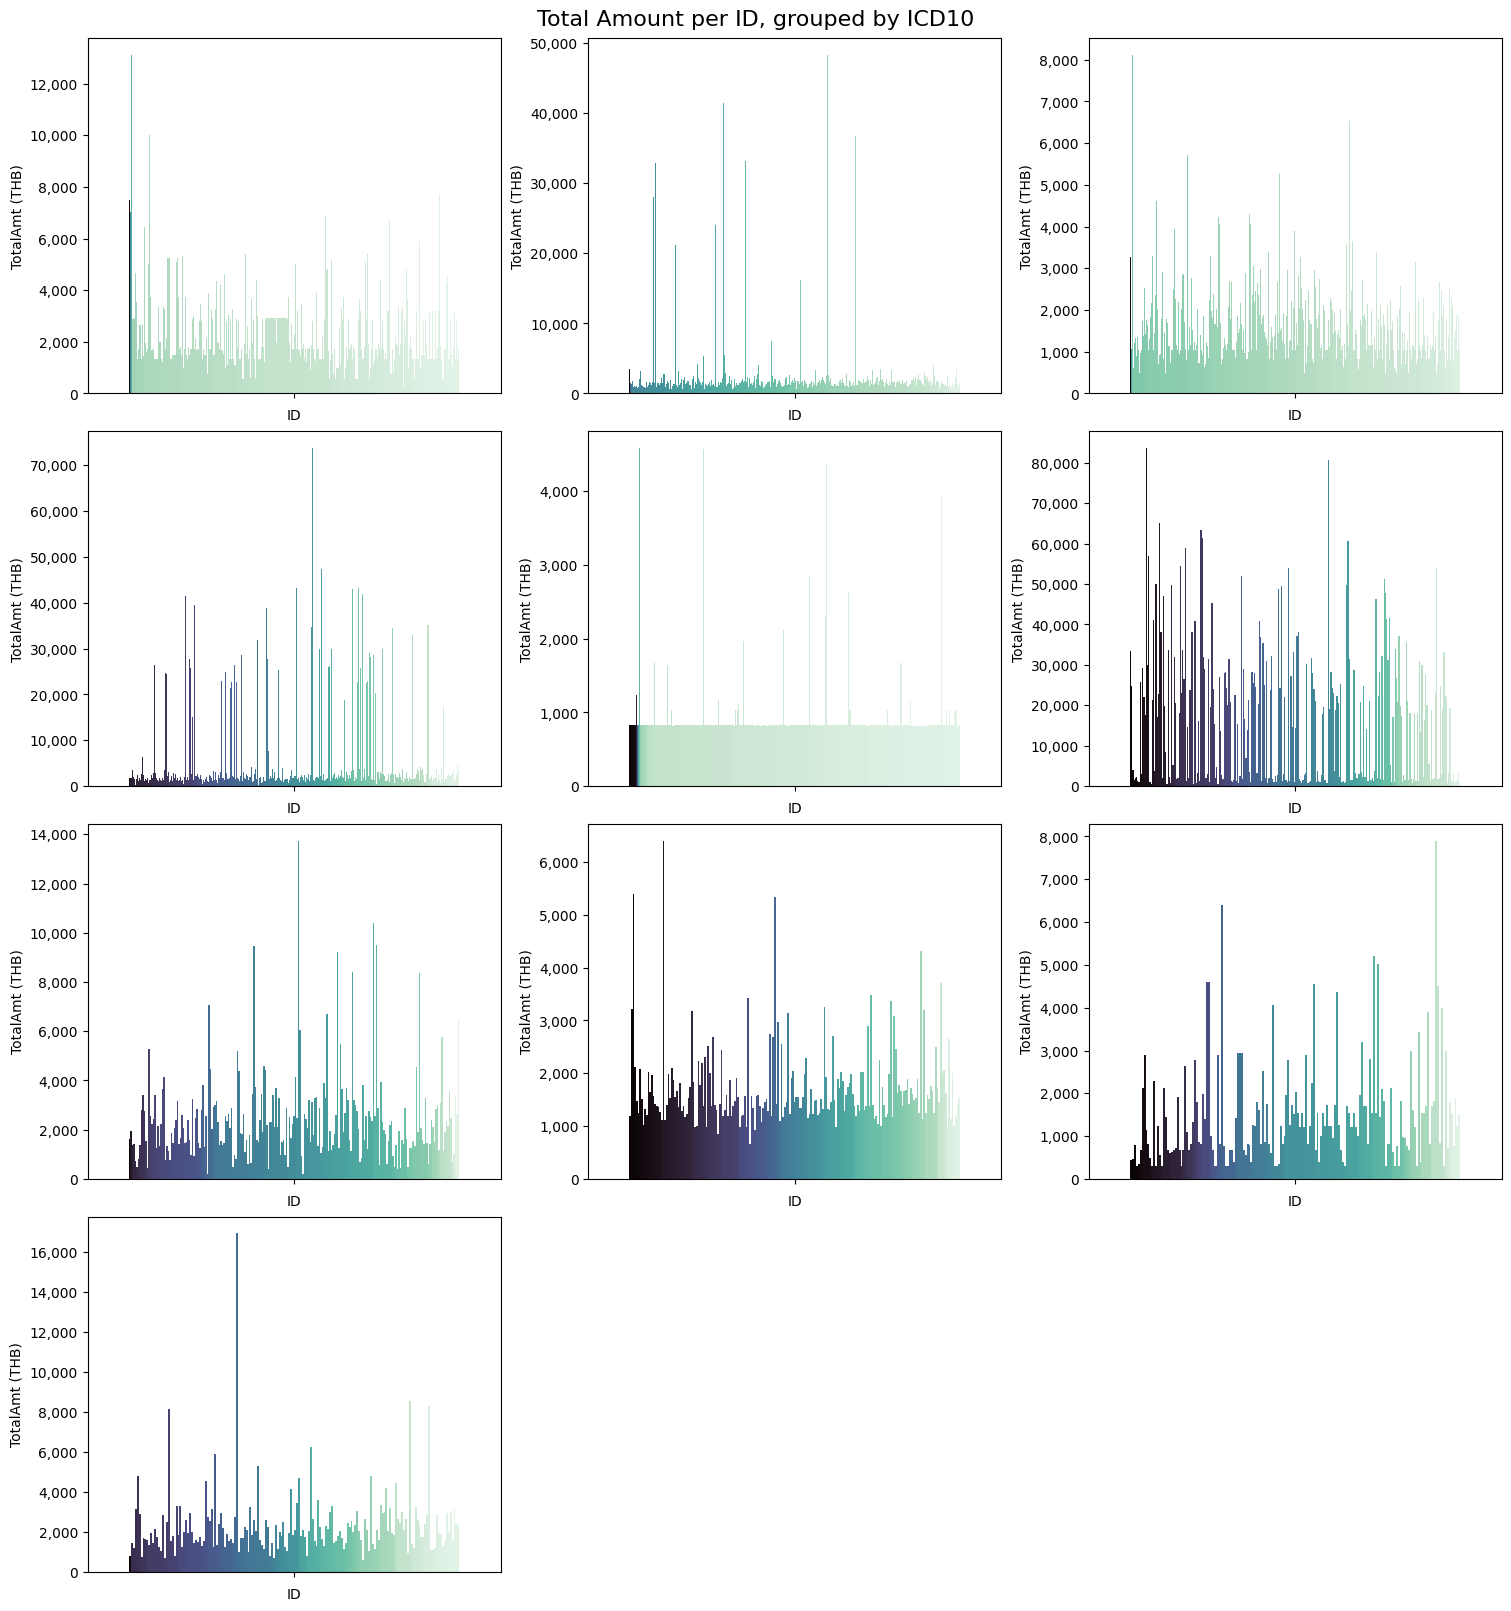

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# เลือก top 6 ICD10 ที่มีจำนวนเคสเยอะที่สุด (เปลี่ยนได้)
top_icd10 = df['ICD10'].value_counts().head(10).index
filtered = df[df['ICD10'].isin(top_icd10)]

# สร้าง subplot layout
n = len(top_icd10)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows), constrained_layout=True)

# กรณี axes เป็น 1D
axes = axes.flatten()

for i, icd in enumerate(top_icd10):
    ax = axes[i]
    sub = filtered[filtered['ICD10'] == icd]

    sns.barplot(data=sub, hue='ID', y='TotalAmt', ax=ax, palette='mako', legend=False)
    # ax.set_title(f'ICD10: {icd}')
    ax.set_xlabel('ID')
    ax.set_ylabel('TotalAmt (THB)')
    ax.tick_params(axis='x', rotation=90)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# ซ่อน subplot ที่ไม่ได้ใช้ (ถ้าจำนวนไม่พอดีกับ grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Total Amount per ID, grouped by ICD10', fontsize=16)
plt.show()

In [ ]:
grouped[grouped['ICD10']=='[Z00] General examination and investigation of persons without complaint and reported diagnosis']

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt
12,989635,O,CheckUp Center ตรวจสุขภาพ,ตรวจโครงสร้างเท้า F/U หลังใส่รองเท้าครบ 1 ปี,None,None,None,None,None,[Z00] General examination and investigation of...,900037,กอ. สุวิชา เตชะภูวภัทร,[97],[1.1.14 (3) ค่าบริการตรวจสุขภาพเหมาจ่าย โปรแกรม],[7500.0],7500.0
37,1048334,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,anemia from iron def เมนส์มาเยอะ--> ผ่าตัดมดลู...,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,-ทานยาไขมันในเลือดสม่ำเสมอ ติดตาม 4 เดือน\r\n-...,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...",ตรวจร่างกาย = ปกติ\r\nPE : GA good consciousne...,[Z00] General examination and investigation of...,DRF1123,พญ. เปรมกมล อินไชยา,"[97, 6]",[1.1.14 (3) ค่าบริการตรวจสุขภาพเหมาจ่าย โปรแกร...,"[3240.0, 750.0]",3990.0
72,1078139,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,None,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,"DM,DLP,US-ไขมันเกาะตับเล็กน้อย ติ่งเนื้อ0.4cm ...","CBC, UA (Urine Analysis), FBS, BUN, Creatinine...",None,[Z00] General examination and investigation of...,DRF0235,พญ. ณภัทร เทพหัสดิน ณ อยุธยา,[97],[1.1.14 (3) ค่าบริการตรวจสุขภาพเหมาจ่าย โปรแกรม],[7019.0],7019.0
216,1104911,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,None,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,TG;สูงเล็กน้อย,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...","bp;110/80,pe;wnl",[Z00] General examination and investigation of...,DRF0253,นพ. อรุณชัย ทองซ้อนกลีบ,"[94, 97, 6, 104, 76]","[1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1...","[100.0, 1480.0, 335.0, 500.0, 100.0]",2515.0
228,1106189,O,OPD ทั่วไป,ตรวจสุขภาพประจำปี,"case F/U stroke dx 07/66 , DLD \r\nBP at home ...",การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,lab: \r\nCXR หัวใจโต\r\nน้ำตาลเกินเล็กน้อย\r\n...,"CBC, FBS, Creatinine, Cholesterol, Triglycerid...","good consciousness, no dysarthria\r\nleft faci...",[Z00] General examination and investigation of...,DRF0241,พญ. ณัฐวรรณ วิถีรุ่งโรจน์,"[94, 6, 97, 115, 76]","[1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1...","[100.0, 10304.0, 2000.0, 600.0, 100.0]",13104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,1146047,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,-ตรวจสุขภาพประจำปี \r\n-อาการทั่วไปปกติดี\r\n-...,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,-ค่าดัชนีมวลกายเกินเกณฑ์ แนะนำควบคุมน้ำหนักให้...,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...","GA : good consciousness\r\nHEENT : not pale, n...",[Z00] General examination and investigation of...,DRP1252,พญ. ศรสวรรค์ สิทธิพงศ์,[97],[1.1.14 (3) ค่าบริการตรวจสุขภาพเหมาจ่าย โปรแกรม],[2900.0],2900.0
9769,1146055,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,-ตรวจสุขภาพประจำปี \r\n-อาการทั่วไปปกติดี\r\n-...,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,-ค่าดัชนีมวลกายเกินเกณฑ์ แนะนำควบคุมน้ำหนักให้...,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...","GA : good consciousness\r\nHEENT : not pale, n...",[Z00] General examination and investigation of...,DRP1252,พญ. ศรสวรรค์ สิทธิพงศ์,[97],[1.1.14 (3) ค่าบริการตรวจสุขภาพเหมาจ่าย โปรแกรม],[1340.0],1340.0
9771,1146061,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,-ตรวจสุขภาพประจำปี \r\n-อาการทั่วไปปกติดี\r\n-...,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,-ค่าดัชนีมวลกายเกินเกณฑ์ แนะนำควบคุมน้ำหนักให้...,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...","GA : good consciousness\r\nHEENT : not pale, n...",[Z00] General examination and investigation of...,DRP1252,พญ. ศรสวรรค์ สิทธิพงศ์,[97],[1.1.14 (3) ค่าบริการตรวจสุขภาพเหมาจ่าย โปรแกรม],[1340.0],1340.0
9787,1146088,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพประจำปี,-ตรวจสุขภาพประจำปี \r\n-อาการทั่วไปปกติดี\r\n-...,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,-ค่าดัชนีมวลกายเกินเกณฑ์ แนะนำควบคุมน้ำหนักให้...,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...","GA : good consciousness\r\nHEENT : not pale, n...",[Z00] General examination and investigation of...,DRP1252,พญ. ศรสวรรค์ สิทธิพงศ์,[97],[1.1.14 (